In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore', category=FutureWarning) # Borrar warnings

In [2]:
df_1=pd.read_csv("Fraude_Ecomerce/cust_transaction_details.csv")
df_2=pd.read_csv("Fraude_Ecomerce/Customer_DF.csv")

In [3]:
df_1.head(3)

,Unnamed: 0,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled


In [4]:
df_2.head(3)

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False


In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Unnamed: 0                        623 non-null    int64 
 1   customerEmail                     623 non-null    object
 2   transactionId                     623 non-null    object
 3   orderId                           623 non-null    object
 4   paymentMethodId                   623 non-null    object
 5   paymentMethodRegistrationFailure  623 non-null    int64 
 6   paymentMethodType                 623 non-null    object
 7   paymentMethodProvider             623 non-null    object
 8   transactionAmount                 623 non-null    int64 
 9   transactionFailed                 623 non-null    int64 
 10  orderState                        623 non-null    object
dtypes: int64(4), object(7)
memory usage: 53.7+ KB


In [6]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              168 non-null    int64 
 1   customerEmail           168 non-null    object
 2   customerPhone           168 non-null    object
 3   customerDevice          168 non-null    object
 4   customerIPAddress       168 non-null    object
 5   customerBillingAddress  168 non-null    object
 6   No_Transactions         168 non-null    int64 
 7   No_Orders               168 non-null    int64 
 8   No_Payments             168 non-null    int64 
 9   Fraud                   168 non-null    bool  
dtypes: bool(1), int64(4), object(5)
memory usage: 12.1+ KB


Ambos tienen la columna customerEmail, que coincide en nombre y es el identificador común.
Por lo tanto, la unión correcta es un LEFT JOIN desde DF1 → DF2, para agregar la información del cliente a cada transacción.

In [7]:
df = df_1.merge(df_2, on="customerEmail", how="left") # Se agrega el dataframe df_2 al df_1 en los que coincida el email, en el resto sera NAN.

In [8]:
df.sample(3)

,Unnamed: 0_x,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState,Unnamed: 0_y,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
766,598,sbrown@hughes.biz,293g6767,57yhdo,wsy5c41nf,0,card,Voyager,30,0,fulfilled,164,(250)632-6631x02499,xgv918sclaz40qlp2fee,16.166.2.0,"9472 Pacheco Islands Suite 940\nDrewburgh, AZ ...",6,5,3,True
758,590,andre74@patrick-decker.com,sdvzm88k,nfryte,6umtakhhu,0,apple pay,VISA 16 digit,46,1,fulfilled,161,150-073-8610,4gfo1e3xeirjanhwko92,d89c:db0:5ff9:a150:9e6c:482d:c900:fb33,"55197 Jeffrey Burgs Suite 700\nGardnerport, VA...",5,4,4,True
215,154,johnlowery@gmail.com,bpvdqkr7,4x7vmr,tfff8yjzo,0,card,American Express,21,0,fulfilled,133,1-143-059-1833,tyijaify2hqadwslejyr,e4c:fb48:8ee2:9819:6ae8:8d3f:3b6a:a788,"518 Wood Mews Apt. 970\nDillonstad, NE 43317-3945",0,0,0,True


In [9]:
df = df.drop(columns=["Unnamed: 0_x"])
df = df.drop(columns=["Unnamed: 0_y"])

In [10]:
df.columns=['e-mail', 'Trans_ID', 'Orden_ID', 'Metodo_Pago', 'Error_Metodo_Pago', 'Tipo_Metodo_Pago', 'Proveed_Metodo_Pago', 'Trans_Monto', 'Fallo_Transaccion', 'Estado', 'Telefono', 'Dispositivo', 'Cliente_IP', 'Domic_Factura', 'N°_Transaccion', 'N°_Orden', 'N°_Pagos', 'Fraude']

In [11]:
df.sample(3)

,e-mail,Trans_ID,Orden_ID,Metodo_Pago,Error_Metodo_Pago,Tipo_Metodo_Pago,Proveed_Metodo_Pago,Trans_Monto,Fallo_Transaccion,Estado,Telefono,Dispositivo,Cliente_IP,Domic_Factura,N°_Transaccion,N°_Orden,N°_Pagos,Fraude
521,wdelacruz@yahoo.com,m4c0aa62,j6lfpo,n8g5z0l5a,0,card,JCB 16 digit,72,0,fulfilled,155.688.4242x443,fmm4yabu9llergl9qbl9,cd18:5626:a1c4:7e99:addf:368e:c98:e772,"3074 Caroline Oval\nLake Maryburgh, MA 15880",4,4,1,True
276,pattersonphilip@yahoo.com,tuyrl147,dkwhx7,6954oj7dx,0,paypal,JCB 16 digit,16,0,fulfilled,(425)200-2228,9gyjtadv75scvq723pow,d1ca:57d4:7c58:8cd4:e100:99d8:3fd6:92f9,"258 Teresa Crescent Apt. 167\nRodriguezmouth, ...",4,4,2,False
626,cuevasvicki@gmail.com,i8w9h2cd,xtzm8c,eyvv5ubc3,0,card,Maestro,33,1,fulfilled,347-432-4171,gjieqcwj7nq91qkgdqb1,89f4:de6f:d732:11dd:c56:c6e1:ce7a:d888,"69632 Baker Prairie Suite 013\nGonzalezhaven, ...",6,5,3,False


In [12]:
df.describe()

,Error_Metodo_Pago,Trans_Monto,Fallo_Transaccion,N°_Transaccion,N°_Orden,N°_Pagos
count,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000
mean,0.100122,35.147741,0.256410,5.195360,3.808303,2.135531
std,0.300346,19.640072,0.436918,2.924214,1.866872,1.860001
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,3.000000,3.000000,1.000000
50%,0.000000,34.000000,0.000000,5.000000,4.000000,2.000000
75%,0.000000,46.000000,1.000000,7.000000,5.000000,3.000000
max,1.000000,353.000000,1.000000,15.000000,8.000000,15.000000


In [13]:
df.isnull().sum()

e-mail                 0
Trans_ID               0
Orden_ID               0
Metodo_Pago            0
Error_Metodo_Pago      0
Tipo_Metodo_Pago       0
Proveed_Metodo_Pago    0
Trans_Monto            0
Fallo_Transaccion      0
Estado                 0
Telefono               0
Dispositivo            0
Cliente_IP             0
Domic_Factura          0
N°_Transaccion         0
N°_Orden               0
N°_Pagos               0
Fraude                 0
dtype: int64

In [14]:
df['e-mail'].value_counts()

e-mail
johnlowery@gmail.com           224
mitchellgriffith@yahoo.com      15
tmcpherson@wright.com           13
lleonard@turner-fleming.com     11
david45@gmail.com               10
                              ... 
victorgarcia@gmail.com           1
oaguirre@hotmail.com             1
aweaver@yahoo.com                1
richard05@hanson-key.org         1
veronica42@stokes.com            1
Name: count, Length: 136, dtype: int64

In [15]:
df['Tipo_Metodo_Pago'].value_counts()

Tipo_Metodo_Pago
card         647
bitcoin       68
paypal        55
apple pay     49
Name: count, dtype: int64

In [16]:
df['Proveed_Metodo_Pago'].value_counts()

Proveed_Metodo_Pago
JCB 16 digit                   167
VISA 16 digit                  166
Maestro                        104
Voyager                         82
American Express                66
VISA 13 digit                   58
Diners Club / Carte Blanche     58
JCB 15 digit                    45
Discover                        41
Mastercard                      32
Name: count, dtype: int64

In [17]:
df['Estado'].value_counts()

Estado
fulfilled    691
failed        84
pending       44
Name: count, dtype: int64

In [18]:
df['Estado'] = df['Estado'].replace({
    'failed': 'Fallido',
    'fulfilled': 'Completado',
    'pending': 'Pendiente'
})

In [19]:
df['Cliente_IP'].value_counts()

Cliente_IP
e4c:fb48:8ee2:9819:6ae8:8d3f:3b6a:a788     28
212.144.68.190                             28
f82c:811f:8a02:e2d6:79b:fcaa:42de:570b     28
f259:657f:f329:2fca:c06c:8b57:d6ac:2380    28
163.128.139.42                             28
                                           ..
81.13.103.118                               1
89e:31aa:e9e2:90ea:aa00:4a8c:805c:20ea      1
2432:d9dc:c6ad:ef9c:c5df:b7bf:1b48:4444     1
acba:ba43:ae87:641c:3009:8355:c6ff:15b9     1
172.69.105.137                              1
Name: count, Length: 140, dtype: int64

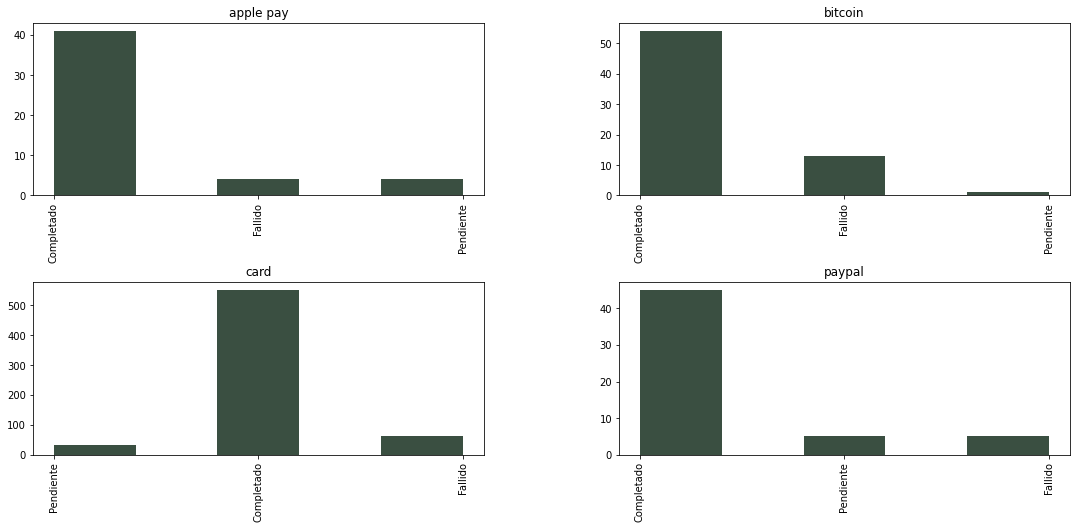

In [20]:
    _=df['Estado'].hist(by=df['Tipo_Metodo_Pago'], bins=5,figsize=[18,8],color='#3A4F41')

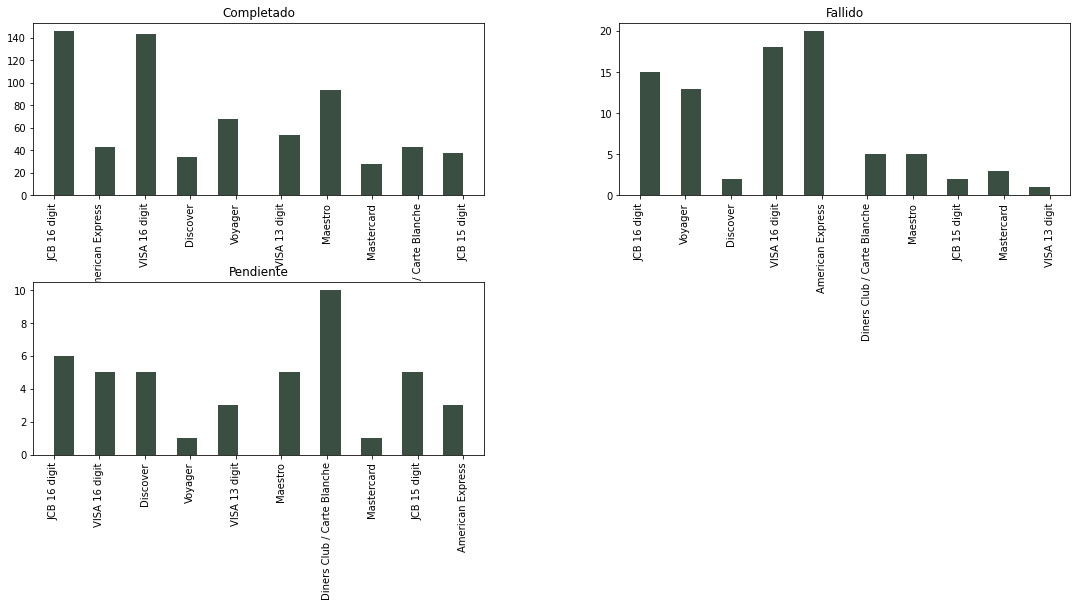

In [21]:
_=df['Proveed_Metodo_Pago'].hist(by=df['Estado'], figsize=[18,8], bins=20, color='#3A4F41')

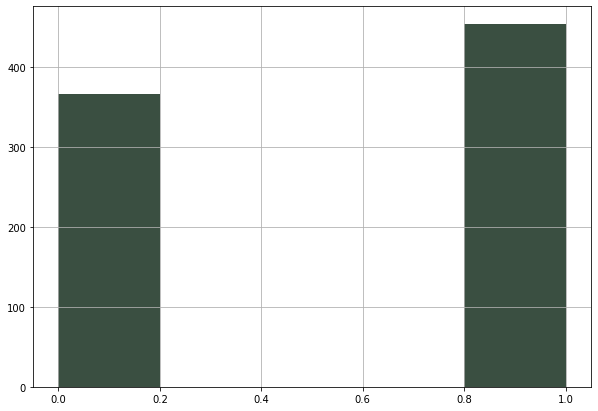

In [22]:
df['Fraude_num'] = df['Fraude'].astype(int) # Convierto la columna a numericos (antes era booleano)
_=df['Fraude_num'].hist(bins=5, figsize=[10,7], color='#3A4F41')

# _= es para quitar textos y la impresion de array y datos, queda solo el gráfico

In [23]:
df.sample(3)

,e-mail,Trans_ID,Orden_ID,Metodo_Pago,Error_Metodo_Pago,Tipo_Metodo_Pago,Proveed_Metodo_Pago,Trans_Monto,Fallo_Transaccion,Estado,Telefono,Dispositivo,Cliente_IP,Domic_Factura,N°_Transaccion,N°_Orden,N°_Pagos,Fraude,Fraude_num
457,watkinscaroline@lewis-haas.com,evap24h5,z4z8pu,zsk2itfp9,0,card,Maestro,11,0,Completado,153-392-3908x8124,mcfj07mm32tyodtfh7z2,244.18.220.218,"991 Melton Viaduct\nWagnerville, NH 56051",2,2,1,False,0
519,wdelacruz@yahoo.com,7prmsn0c,q60uc8,n8g5z0l5a,0,card,JCB 16 digit,46,0,Fallido,155.688.4242x443,fmm4yabu9llergl9qbl9,cd18:5626:a1c4:7e99:addf:368e:c98:e772,"3074 Caroline Oval\nLake Maryburgh, MA 15880",4,4,1,True,1
136,natalie98@yahoo.com,c60my23d,ssdsca,kafhtdkmr,0,card,VISA 16 digit,23,0,Completado,02934317865,x5ts382m7jezato91fjz,89e:31aa:e9e2:90ea:aa00:4a8c:805c:20ea,"23831 Adams Tunnel Suite 538\nNorth David, NE ...",1,1,1,False,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   e-mail               819 non-null    object
 1   Trans_ID             819 non-null    object
 2   Orden_ID             819 non-null    object
 3   Metodo_Pago          819 non-null    object
 4   Error_Metodo_Pago    819 non-null    int64 
 5   Tipo_Metodo_Pago     819 non-null    object
 6   Proveed_Metodo_Pago  819 non-null    object
 7   Trans_Monto          819 non-null    int64 
 8   Fallo_Transaccion    819 non-null    int64 
 9   Estado               819 non-null    object
 10  Telefono             819 non-null    object
 11  Dispositivo          819 non-null    object
 12  Cliente_IP           819 non-null    object
 13  Domic_Factura        819 non-null    object
 14  N°_Transaccion       819 non-null    int64 
 15  N°_Orden             819 non-null    int64 
 16  N°_Pagos

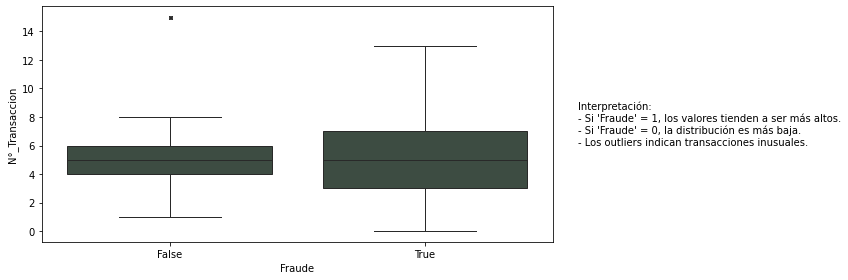

In [25]:
fig = plt.figure(figsize=(12, 4))

sns.boxplot(
    x='Fraude',
    y='N°_Transaccion',
    data=df,
    color='#3A4F41',
    fliersize=3,
    flierprops={'marker':'x', 'color':'red', 'alpha':0.5}
)

# Texto a la derecha
plt.text(
    1.05, 0.5,
    "Interpretación:\n"
    "- Si 'Fraude' = 1, los valores tienden a ser más altos.\n"
    "- Si 'Fraude' = 0, la distribución es más baja.\n"
    "- Los outliers indican transacciones inusuales.",
    transform=plt.gca().transAxes,
    va='center'
)

plt.tight_layout()
plt.show()


<AxesSubplot:xlabel='Fraude', ylabel='N°_Pagos'>

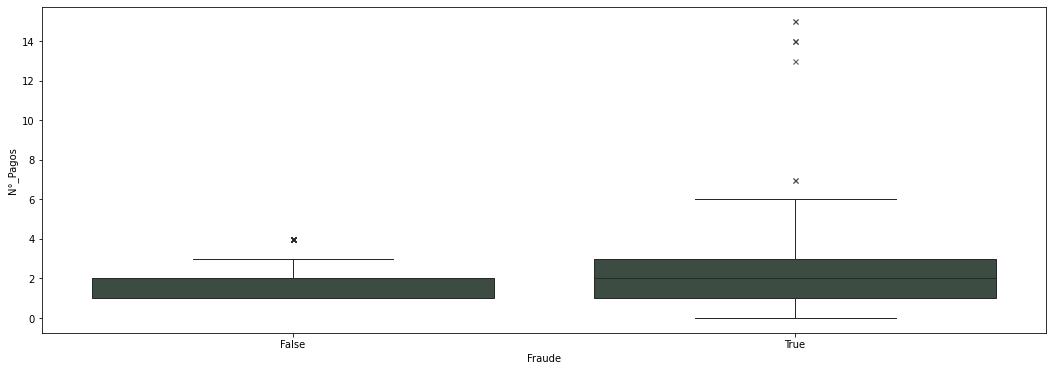

In [26]:
plt.figure(figsize=(18, 6))
sns.boxplot(x='Fraude', y='N°_Pagos', data=df, color='#3A4F41', fliersize=5,           # tamaño de los outliers
    flierprops={'marker':'x', 'color':'red', 'alpha':0.5})

<AxesSubplot:xlabel='Fraude', ylabel='N°_Orden'>

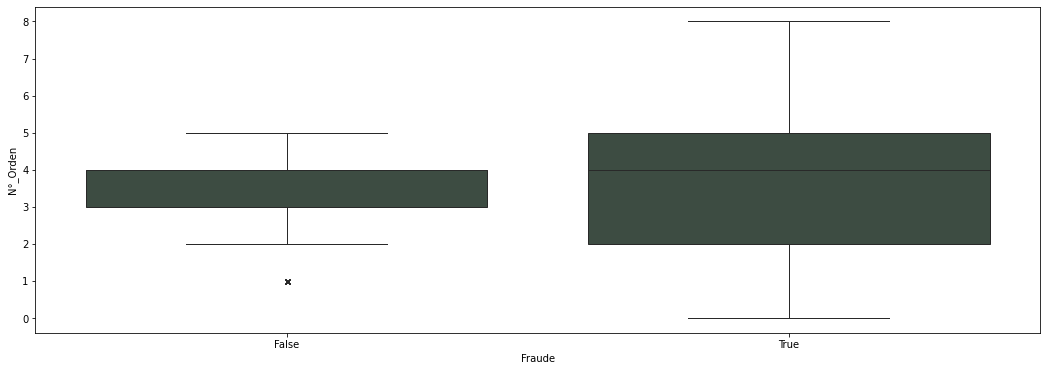

In [27]:
plt.figure(figsize=(18, 6))
sns.boxplot(x='Fraude', y='N°_Orden', data=df, color='#3A4F41', fliersize=5,           # tamaño de los outliers
    flierprops={'marker':'x', 'color':'red', 'alpha':0.5})

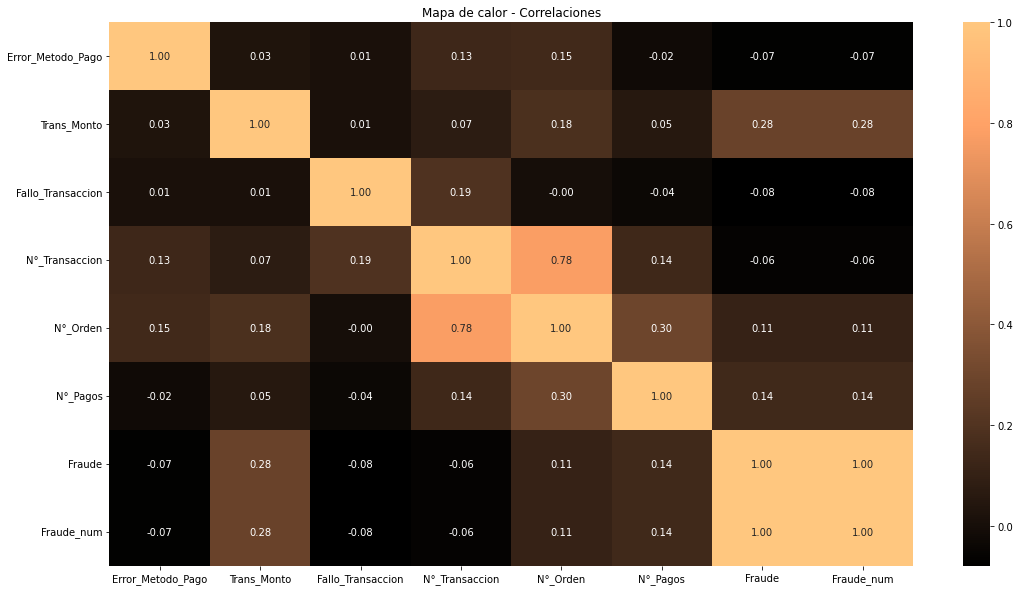

In [28]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(18, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='copper')
plt.title('Mapa de calor - Correlaciones')
plt.show()